## Opening Packages

In [1]:
#Importatation of packages

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

S:\Anaconda_3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Opening Data

In [2]:
#Opening data

raw_data = pd.read_excel('cal_school_austin.xlsx')
raw_data.head(5)

,Observation Number,dist_cod,county,district,gr_span,students,teachers,student_rat,computers,comp_rat,expenditure,calw_pct,meal_pct,engl_pct,wage_avg,read_scr,math_scr,test_scr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,17.889910,67,0.343590,6384.911133,0.510200,2.040800,0.000000,22.690001,691.599976,690.000000,690.799988
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,21.524664,101,0.420833,5099.380859,15.416700,47.916698,4.583333,9.824000,660.500000,661.900024,661.200012
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,18.697226,169,0.109032,5501.954590,55.032299,76.322601,30.000002,8.978000,636.299988,650.900024,643.599976
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,17.357143,85,0.349794,7101.831055,36.475399,77.049202,0.000000,8.978000,651.900024,643.500000,647.700012
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,18.671329,171,0.128090,5235.987793,33.108601,78.427002,13.857677,9.080333,641.799988,639.900024,640.849976


In [3]:
raw_data.describe()

,Observation Number,dist_cod,students,teachers,student_rat,computers,comp_rat,expenditure,calw_pct,meal_pct,engl_pct,wage_avg,read_scr,math_scr,test_scr
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,210.500000,67472.809524,2628.792857,129.067376,19.640425,303.383333,0.135927,5312.407541,13.246042,44.705237,15.768155,15.316588,654.970477,653.342619,654.156548
std,121.387808,3466.994655,3913.104985,187.912679,1.891812,441.341298,0.064956,633.937053,11.454821,27.123381,18.285927,7.225890,20.107980,18.754202,19.053348
min,1.000000,61382.000000,81.000000,4.850000,14.000000,0.000000,0.000000,3926.069580,0.000000,0.000000,0.000000,5.335000,604.500000,605.400024,605.550049
25%,105.750000,64307.750000,379.000000,19.662499,18.582360,46.000000,0.093767,4906.180054,4.395375,23.282200,1.940807,10.639000,640.400024,639.375015,640.049988
50%,210.500000,67760.500000,950.500000,48.564999,19.723208,117.500000,0.125464,5214.516602,10.520450,41.750700,8.777634,13.727800,655.750000,652.449982,654.449982
75%,315.250000,70419.000000,3008.000000,146.350002,20.871815,375.250000,0.164466,5601.401367,18.981350,66.864725,22.970003,17.629001,668.725006,665.849991,666.662506
max,420.000000,75440.000000,27176.000000,1429.000000,25.799999,3324.000000,0.420833,7711.506836,78.994202,100.000000,85.539719,55.327999,704.000000,709.500000,706.750000


## Creating 80% sample (train dataset)

In [4]:
#Randomisation

state = 470403675 + 480234179 + 460496636

train = raw_data.sample(frac= 0.8, random_state= state)       # Q1-5
test = raw_data[raw_data.index.isin(train.index) == False].copy() # prediction

train = train.reset_index(drop= True)
test = test.reset_index(drop= True)

In [5]:
train.head(5)

,Observation Number,dist_cod,county,district,gr_span,students,teachers,student_rat,computers,comp_rat,expenditure,calw_pct,meal_pct,engl_pct,wage_avg,read_scr,math_scr,test_scr
0,123,62000,Fresno,American Union Elementary,KK-08,418,22.400000,18.660715,50,0.119617,5522.161621,10.6965,63.432800,19.856459,7.3850,640.200012,644.599976,642.400024
1,287,71522,Tehama,Evergreen Union Elementary,KK-08,823,46.000000,17.891304,127,0.154313,5331.920898,13.8518,55.285500,2.187120,10.5510,657.700012,670.099976,663.900024
2,76,67694,San Bernardino,Cucamonga Elementary,KK-08,2660,140.119995,18.983728,259,0.097368,5267.831055,15.7601,74.850998,25.225565,14.4678,637.799988,632.099976,634.949951
3,22,72058,Tulare,Pleasant View Elementary,KK-08,475,21.000000,22.619047,53,0.111579,4542.104980,21.6495,91.546402,16.210526,9.6300,619.900024,622.900024,621.400024
4,373,66340,Nevada,Nevada City Elementary,KK-08,1579,80.239998,19.678465,165,0.104497,5146.784180,5.5556,21.780300,0.063331,15.4280,678.500000,677.400024,677.950012


In [6]:
train.describe()

,Observation Number,dist_cod,students,teachers,student_rat,computers,comp_rat,expenditure,calw_pct,meal_pct,engl_pct,wage_avg,read_scr,math_scr,test_scr
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,211.839286,67584.895833,2686.392857,132.134042,19.680628,310.491071,0.134454,5289.663959,12.827244,43.673936,15.981793,15.445142,655.268751,653.587499,654.428125
std,120.282470,3406.517434,4019.364963,193.952790,1.920953,448.766701,0.066489,634.369398,11.323326,27.027004,18.639950,7.209894,19.863002,18.475709,18.792384
min,1.000000,61457.000000,92.000000,5.000000,14.000000,0.000000,0.000000,3926.069580,0.000000,0.000000,0.000000,5.335000,604.500000,609.000000,606.750000
25%,114.750000,64704.500000,415.750000,20.075000,18.658235,47.750000,0.091660,4894.326294,4.231700,23.194075,1.919947,10.652750,640.699997,641.325012,641.524979
50%,211.500000,67868.500000,975.000000,51.674999,19.775999,122.000000,0.124523,5189.968994,10.225150,39.567202,8.755189,14.022125,656.000000,652.649994,654.724976
75%,315.250000,70445.750000,3008.000000,146.869999,20.889744,385.000000,0.159048,5527.823120,18.333849,63.525500,23.360497,17.669250,668.725006,665.799988,666.662506
max,420.000000,75440.000000,27176.000000,1429.000000,25.799999,3324.000000,0.420833,7711.506836,78.994202,100.000000,85.539719,50.676998,704.000000,709.500000,706.750000


## Boxplots

https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

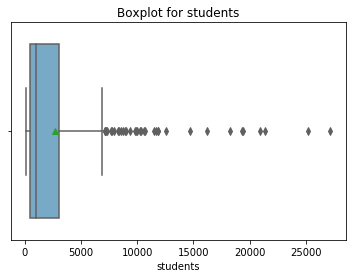

In [7]:
#students

box_plot_students = sns.boxplot(x= train['students'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for students')

plt.show()

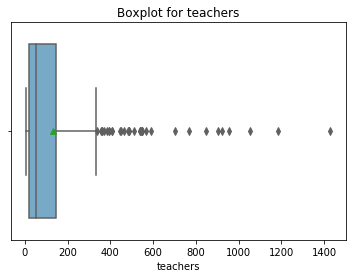

In [8]:
#teachers

box_plot_teachers = sns.boxplot(x= train['teachers'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for teachers')

plt.show()

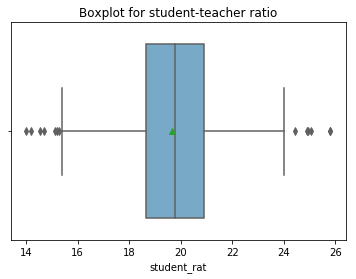

In [9]:
#student_rat

box_plot_student_rat = sns.boxplot(x= train['student_rat'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for student-teacher ratio')

plt.show()

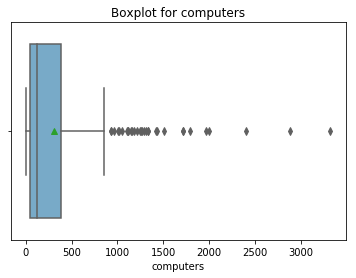

In [10]:
#computers

box_plot_computers = sns.boxplot(x= train['computers'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for computers')

plt.show()

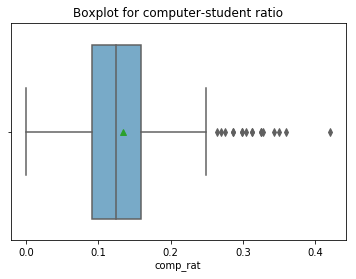

In [11]:
#comp_rat

box_plot_comp_rat = sns.boxplot(x= train['comp_rat'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for computer-student ratio')

plt.show()

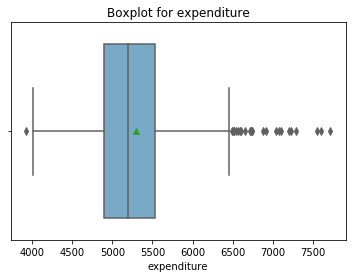

In [12]:
#expenditure

box_plot_expenditure = sns.boxplot(x= train['expenditure'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for expenditure')

plt.show()

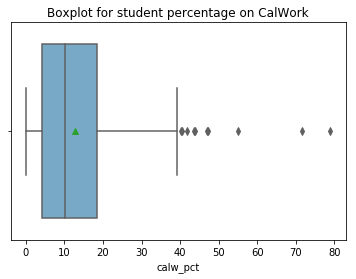

In [13]:
#calw_pct

box_plot_calw_pct = sns.boxplot(x= train['calw_pct'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for student percentage on CalWork')

plt.show()

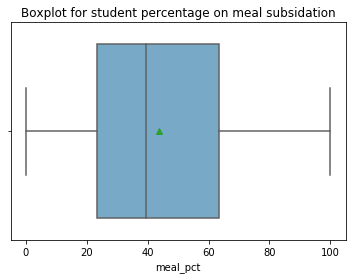

In [14]:
#meal_pct

box_plot_meal_pct = sns.boxplot(x= train['meal_pct'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for student percentage on meal subsidation')

plt.show()

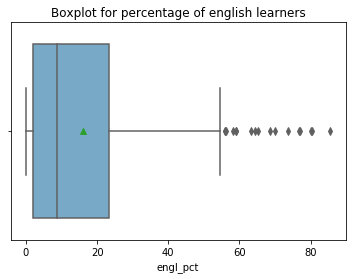

In [15]:
#engl_pct

box_plot_engl_pct = sns.boxplot(x= train['engl_pct'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for percentage of english learners')

plt.show()

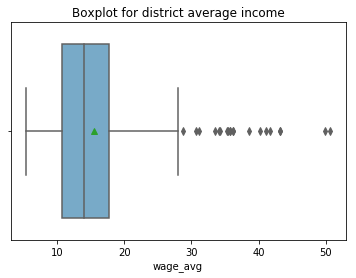

In [16]:
#wage_avg

box_plot_wage_avg = sns.boxplot(x= train['wage_avg'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for district average income')

plt.show()

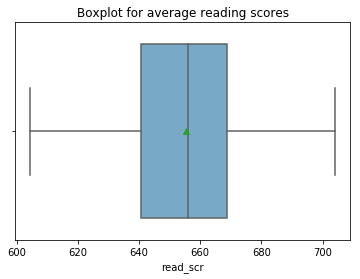

In [17]:
#read_scr

box_plot_read_scr = sns.boxplot(x= train['read_scr'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for average reading scores')

plt.show()

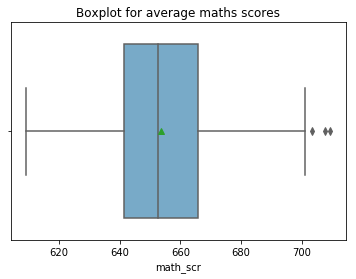

In [18]:
#math_scr

box_plot_math_scr = sns.boxplot(x= train['math_scr'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for average maths scores')

plt.show()

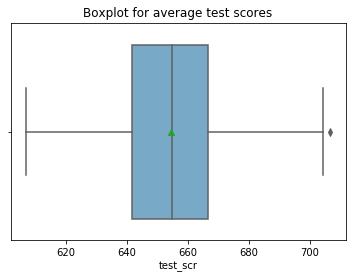

In [31]:
#test_scr

box_plot_test_scr = sns.boxplot(x= train['test_scr'], data= train, palette='Blues', showmeans=True)

plt.title('Boxplot for average test scores')

plt.show()

## Correlation Heat Map

https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### School Characteristics Heat Map

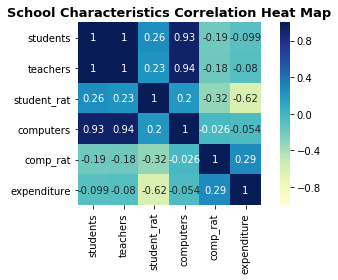

In [20]:
school_variables = ['students', 'teachers', 'student_rat', 'computers', 'comp_rat', 'expenditure']

fig, heat_map_1 = plt.subplots()
sns.heatmap(train[school_variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= True, ax= heat_map_1, cmap= 'YlGnBu')

heat_map_1.set_title('School Characteristics Correlation Heat Map', fontweight= 'bold', fontsize= 13)

plt.tight_layout()
plt.show()

#### Demographic Characteristics Heat Map

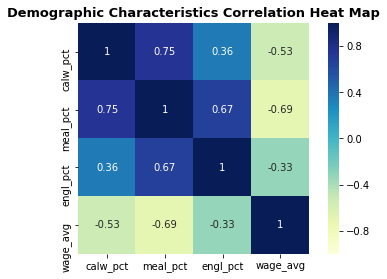

In [21]:
demographic_variables = ['calw_pct', 'meal_pct', 'engl_pct', 'wage_avg']

fig, heat_map_2 = plt.subplots()
sns.heatmap(train[demographic_variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= True, ax= heat_map_2, cmap= 'YlGnBu')

heat_map_2.set_title('Demographic Characteristics Correlation Heat Map', fontweight= 'bold', fontsize= 13)

plt.tight_layout()
plt.show()

#### Test Score Characteristics Heat Map

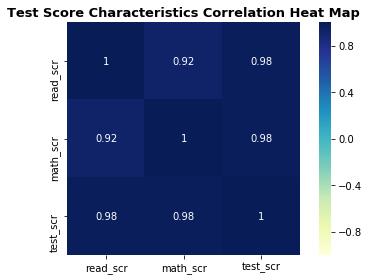

In [22]:
test_variables = ['read_scr', 'math_scr', 'test_scr']

fig, heat_map_3 = plt.subplots()
sns.heatmap(train[test_variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= True, ax= heat_map_3, cmap= 'YlGnBu')

heat_map_3.set_title('Test Score Characteristics Correlation Heat Map', fontweight= 'bold', fontsize= 13)

plt.tight_layout()
plt.show()

#### All Variable Heat Map

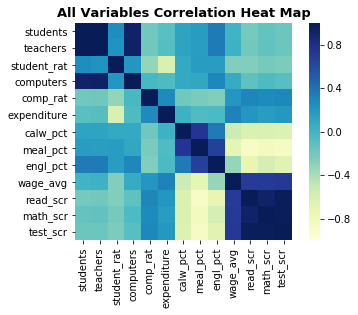

In [23]:
all_variables = ['students', 'teachers', 'student_rat', 'computers', 'comp_rat', 'expenditure', 'calw_pct', 'meal_pct', 'engl_pct', 'wage_avg', 'read_scr', 'math_scr', 'test_scr']

fig, heat_map_4 = plt.subplots()
sns.heatmap(train[all_variables].corr(), vmax= 1, vmin= -1, center= 0, square= True, annot= False, ax= heat_map_4, cmap= 'YlGnBu')

heat_map_4.set_title('All Variables Correlation Heat Map', fontweight= 'bold', fontsize= 13)

plt.show()

## Scatterplot Matrix

https://seaborn.pydata.org/generated/seaborn.pairplot.html

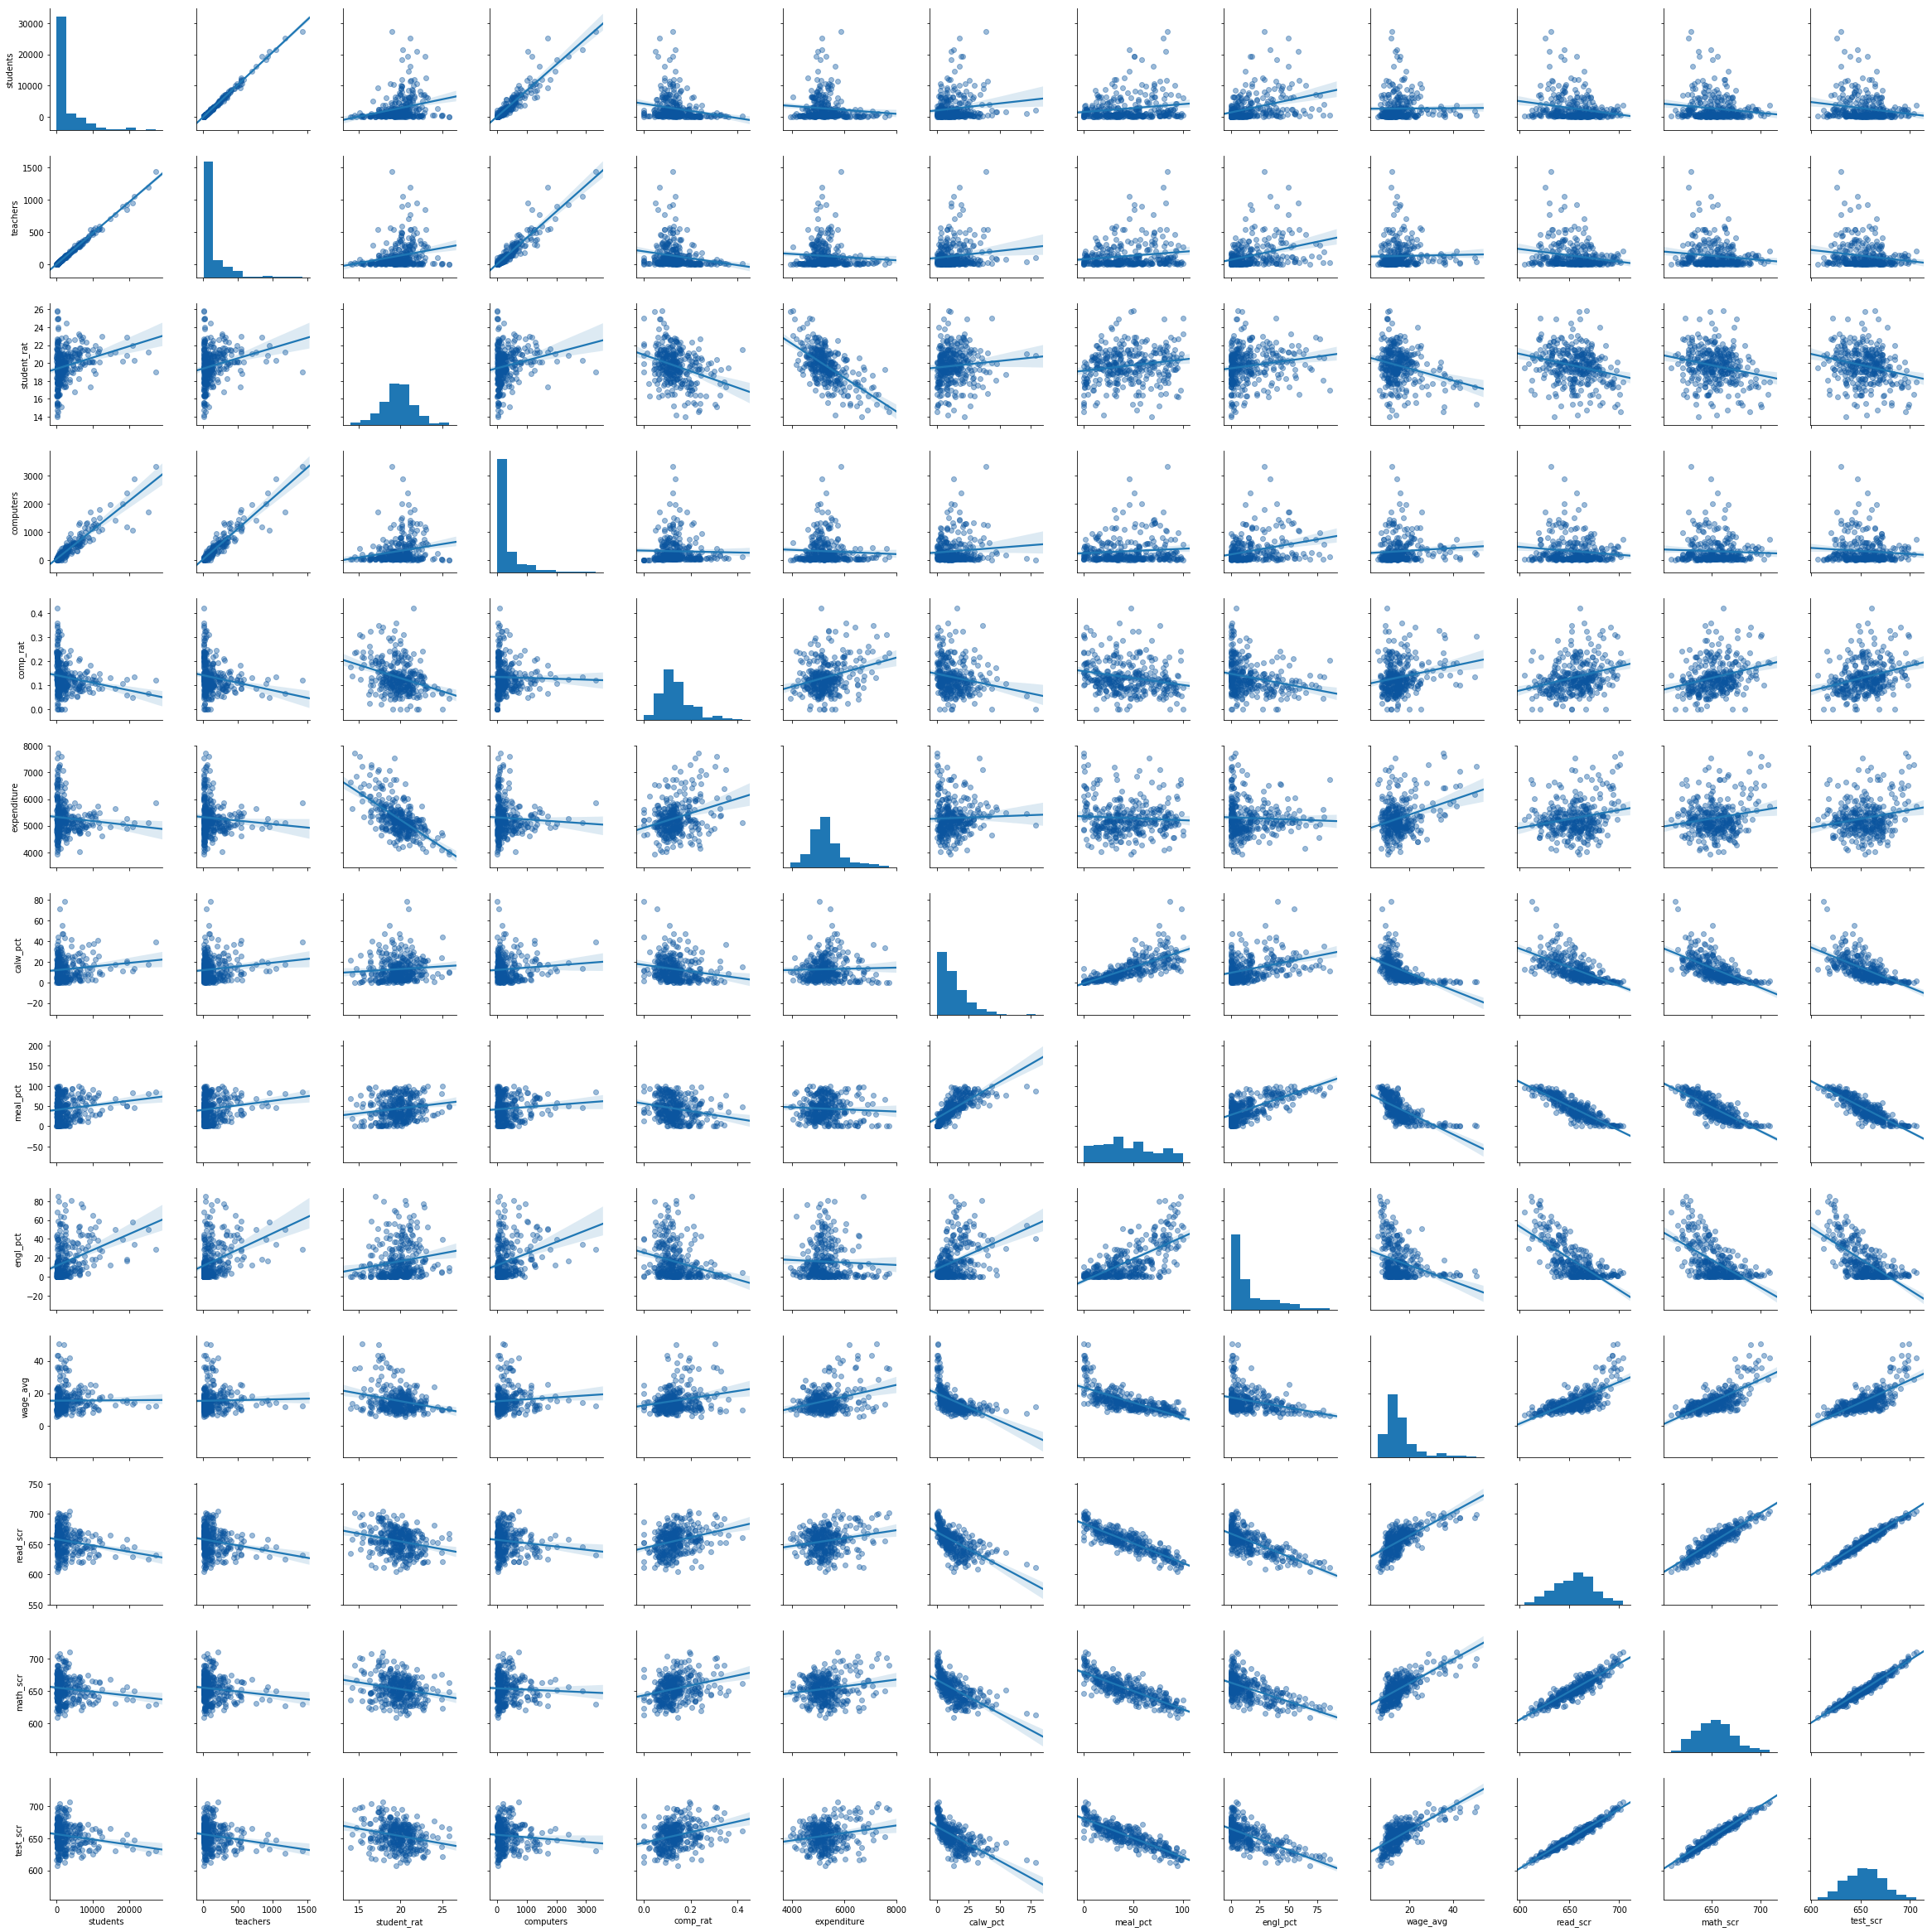

In [24]:
scatterplot_matrix_1 = sns.pairplot(train[all_variables], kind= 'reg', plot_kws = {'scatter_kws' :{'color': sns.color_palette('Blues')[-1], 'alpha': 0.4}})

plt.tight_layout()
plt.show()

## SLR with class size and avg. test scores

http://www.statsmodels.org/devel/


Note horizontal axis is the independent variable. Verticle axis is the dependent variable

#### Hetroscedasticity

We created 2 graphs. One showing a simple scatterplot and another regression plot to determine heteroscedasticity (unequal variance of a variable because of a 2nd variable).

It seems that our data is fairly homoscedastic. Explain why this is important for having an unbiased test

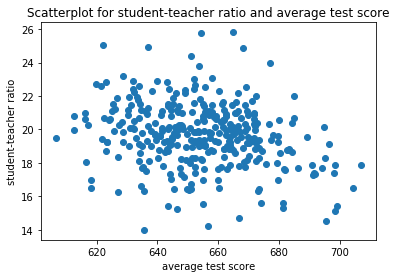

In [26]:
plt.scatter(train['test_scr'], train['student_rat'])

plt.title('Scatterplot for student-teacher ratio and average test score')
plt.xlabel('average test score')
plt.ylabel('student-teacher ratio')

plt.show()

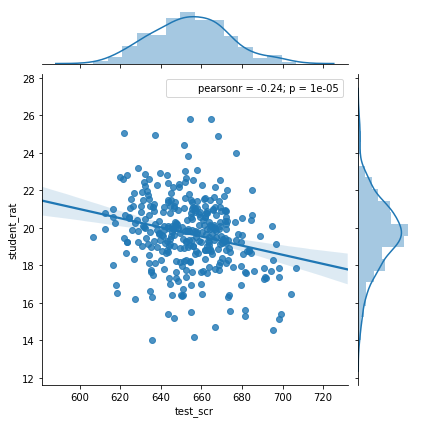

In [27]:
sns.jointplot(x= train['test_scr'], y= train['student_rat'], kind= 'reg')

#plt.title('Regression plot for student-teacher ratio and average test score')

plt.show()

#### Why use OLS for regression?

We used a locally-smoothed regression curve (lowess) that somewhat fits our data...it's rather bumpy in the middle but generally follows a gradual negative gradient

Not really sure of what to make of this. Is OLS the best calculation to use as an estimator? We only know LAD and OLS where LAD is used where we can't satisfy LSA 5. So I don't know what to say here.

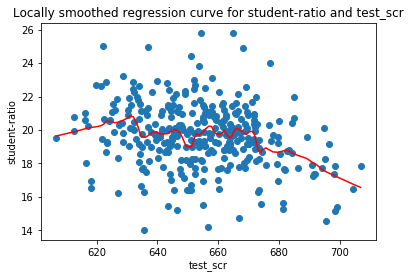

In [28]:
import statsmodels.api as sm

lowess_slr_1 = sm.nonparametric.lowess
plt.scatter(train['test_scr'], train['student_rat'])
z1 = lowess_slr_1(train['student_rat'], train['test_scr'], frac=1./10)
plt.plot(z1[:,0],z1[:,1],'red')

plt.title('Locally smoothed regression curve for student-ratio and test_scr')
plt.xlabel('test_scr')
plt.ylabel('student-ratio')

plt.show()

#### SLR (student_rat VS test_scr)

In [29]:
import statsmodels.formula.api as smf

slr_1 = smf.ols(formula='student_rat ~ test_scr', data= train).fit()
slr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            student_rat   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     20.13
Date:                Sat, 26 May 2018   Prob (F-statistic):           9.97e-06
Time:                        15:46:34   Log-Likelihood:                -685.78
No. Observations:                 336   AIC:                             1376.
Df Residuals:                     334   BIC:                             1383.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6294      3.556     10.019      0.000      28.634      42.625
test_scr      -0.0244      0.005     -4.487      0.000      -0.035      -0.014
==============================================================================
Omnibus:                        7.557   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.023   Jarque-Bera (JB):               12.290
Skew:                          -0.034   Prob(JB):                      0.00214
Kurtosis:                       3.934   Cond. No.                     2.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Plotting resudials to test LSA

https://seaborn.pydata.org/generated/seaborn.residplot.html

Note residuals is plotted with e = Y - Y(hat)

We plotted a locally-smoothed regression curve (lowess) to help determine if there is a pattern in the residuals. Towards higher test scores, there is a negative trend which may indicate a pattern that forms for higher test scores.

The group of data in the residual plot suggests that on average, the residual is 0 for each value of X. This satisfies LSA 1 and 2.

Is our data independent and indentically distributed? Should be perhaps we should take a random sample to make sure to satisfy LSA 3

Furthermore, from our earlier exploratory analysis, the boxplots for test_scr and student_ratio show very little outliers so we can assume that the 4th moments are finite.

Text(0,0.5,'Residuals')

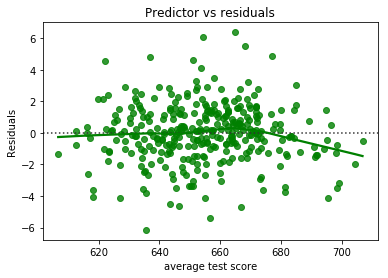

In [30]:
sns.residplot(train['test_scr'], train['student_rat'], lowess=True, color="g")

plt.title('Predictor vs residuals')
plt.xlabel('average test score')
plt.ylabel('Residuals')